In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
import numpy as np

In [3]:
data1 = pd.read_csv("SalaryData_Train(1).csv")
data1.head()



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data1.shape

(30161, 14)

In [5]:
data2 = pd.read_csv("SalaryData_Test(1).csv")
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
data2.shape

(15060, 14)

In [7]:
sal_data = pd.concat([data1,data2])
sal_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
sal_data.shape

(45221, 14)

In [9]:
sal_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
sal_data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [11]:
sal_data.education.nunique()

16

In [12]:
sal_data.educationno.unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

In [13]:
sal_data.educationno.nunique()



16

In [14]:
sal_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

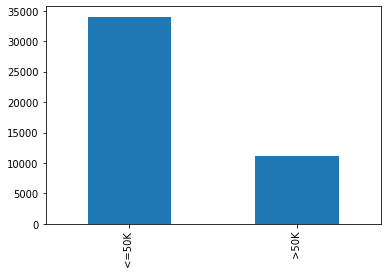

In [15]:
sal_data['Salary'].value_counts().plot.bar()

In [16]:
## Note:Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed.However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group

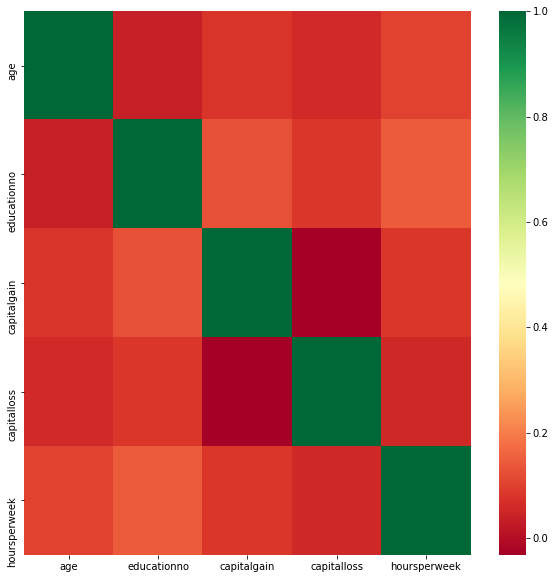

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(sal_data.corr(),cmap="RdYlGn")

In [18]:
# Feature Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [19]:
sal_data = sal_data.apply(LabelEncoder().fit_transform)
sal_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,26,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [20]:
sal_data.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [21]:
# Model Building
X = sal_data.drop('Salary',axis=1)
y = sal_data[['Salary']]

In [22]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,26,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37
15056,22,2,9,12,0,9,1,4,0,0,0,35,37
15057,21,2,9,12,2,9,0,4,1,0,0,49,37
15058,27,2,9,12,0,0,3,1,1,81,0,39,37


In [23]:
y

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((36176, 13), (36176, 1), (9045, 13), (9045, 1))

In [25]:
X.std()

age              13.217981
workclass         0.958132
education         3.816992
educationno       2.552909
maritalstatus     1.500460
occupation        4.026444
relationship      1.597242
race              0.832361
sex               0.468357
capitalgain      23.916262
capitalloss      10.938602
hoursperweek     11.909712
native            5.931380
dtype: float64

In [26]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

sal_data = norm_func(X)

In [27]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = "rbf")
svc_classifier.fit(X_train,y_train)
y_pred_test = svc_classifier.predict(X_test)

In [28]:
acc = accuracy_score(y_test, y_pred_test)
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_test)

Accuracy = 0.8091763405196241


array([[6675,   96],
       [1630,  644]])

Overall Accuracy :  0.8092
Precision        :  0.8703
Recall           :  0.2832
AUC Score        :  0.6345
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

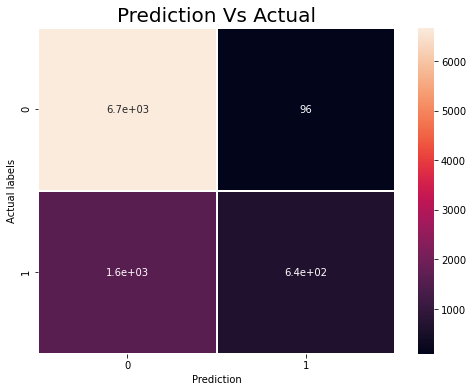

In [30]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)